In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
matic = pd.read_csv ('./matic_2.csv')

In [30]:
matic['time'] = matic['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
matic['time'] = pd.to_datetime(matic["time"])
matic.set_index("time", inplace = True)

In [31]:
def Buy_RSI(matic):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(matic)):
    if (matic ['RSI'][i] < 20):
      if flag != 1:
        sigPriceBuy.append(matic['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (matic["RSI"][i] > 72):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(matic["close"][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [32]:
Buy_RSI = Buy_RSI(matic)
matic['Long Signal RSI'] = Buy_RSI[0]
matic['Close Long Signal RSI'] = Buy_RSI[1]
# To show the data
matic.head()

,open,high,low,close,Volume,RSI,K,D,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,,
2022-12-05 01:00:00,0.9208,0.9217,0.9180,0.9180,274990,NaN,NaN,NaN,NaN,NaN
2022-12-05 01:05:00,0.9180,0.9198,0.9180,0.9195,39511,NaN,NaN,NaN,NaN,NaN
2022-12-05 01:10:00,0.9195,0.9209,0.9188,0.9194,238820,NaN,NaN,NaN,NaN,NaN
2022-12-05 01:15:00,0.9194,0.9201,0.9180,0.9191,245757,NaN,NaN,NaN,NaN,NaN
2022-12-05 01:20:00,0.9191,0.9191,0.9183,0.9190,62145,NaN,NaN,NaN,NaN,NaN


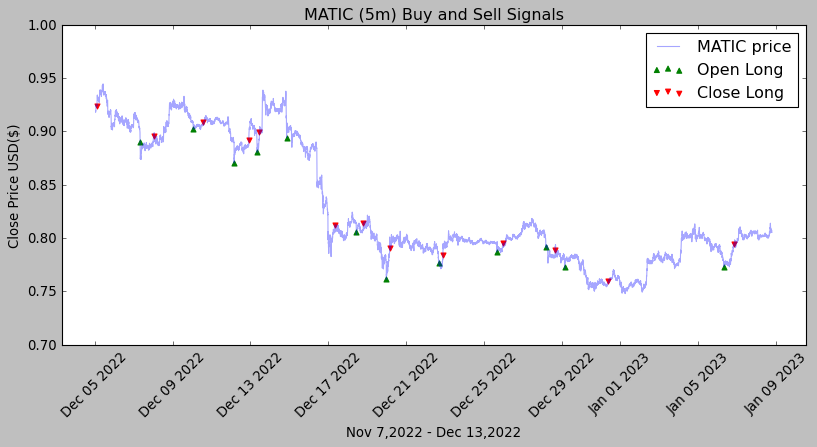

In [33]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(matic['close'], label='MATIC price', alpha=0.35)
plt.plot(matic['Long Signal RSI'], label='', alpha=0.35)
plt.plot(matic['Close Long Signal RSI'],label='', alpha=0.35)
plt.scatter(matic.index, matic['Long Signal RSI'], label ='Open Long', marker='^',color='green')
plt.scatter(matic.index, matic['Close Long Signal RSI'], label='Close Long', marker='v', color='red')
plt.title('MATIC (5m) Buy and Sell Signals')
plt.xlabel("Nov 7,2022 - Dec 13,2022")
plt.xticks(rotation = '45')
plt.ylabel("Close Price USD($)")
plt.legend(loc='upper right')
plt.show()

In [34]:
df = matic.loc[(matic["Long Signal RSI"].notnull()) | (matic["Close Long Signal RSI"].notnull())]
#df = df.drop(df.index[0]).drop(df.index[-1])
df = df.drop(df.index[0])
df.head()

,open,high,low,close,Volume,RSI,K,D,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,,
2022-12-07 07:50:00,0.8994,0.8994,0.8852,0.8905,4652176,12.772113,1.395431e+01,40.081145,0.8905,NaN
2022-12-08 00:30:00,0.8940,0.8967,0.8936,0.8958,268983,74.669749,9.742604e+01,95.203595,NaN,0.8958
2022-12-10 01:30:00,0.9043,0.9047,0.9018,0.9022,461095,18.606314,8.590000e-15,0.374124,0.9022,NaN
2022-12-10 13:45:00,0.9076,0.9091,0.9075,0.9089,361929,73.108143,8.482174e+01,64.278581,NaN,0.9089
2022-12-12 03:50:00,0.8894,0.8894,0.8683,0.8704,12452708,11.888040,2.189889e+00,2.156715,0.8704,NaN


In [35]:
open_list = list(df["Long Signal RSI"])
close_list = list(df["Close Long Signal RSI"])
open = [x for x in open_list if np.isnan(x) == False]
close = [x for x in close_list if np.isnan(x) == False]

In [36]:
positions = {'Open': open, 'Close': close}
positions = pd.DataFrame(positions)
positions

,Open,Close
0,0.8905,0.8958
1,0.9022,0.9089
2,0.8704,0.8922
3,0.8805,0.8994
4,0.8943,0.8124
5,0.8058,0.8138
6,0.7613,0.7906
7,0.7766,0.7838
8,0.7870,0.7951
9,0.7915,0.7891


In [37]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [38]:
positions['Gained or Lost %'] = percentage_change(positions['Open'],positions['Close'])  
positions['Money made when risk is 100$'] = positions['Gained or Lost %'] * 50

In [39]:
positions["Money made when stop loss at 2%"] = np.where(positions["Money made when risk is 100$"] < -100, -100, positions["Money made when risk is 100$"])
positions.loc["Row_Total"] = positions.sum()

In [40]:
positions

,Open,Close,Gained or Lost %,Money made when risk is 100$,Money made when stop loss at 2%
0,0.8905,0.8958,0.595171,29.758563,29.758563
1,0.9022,0.9089,0.742629,37.131456,37.131456
2,0.8704,0.8922,2.504596,125.229779,125.229779
3,0.8805,0.8994,2.146508,107.325383,107.325383
4,0.8943,0.8124,-9.158001,-457.900034,-100.000000
5,0.8058,0.8138,0.992802,49.640109,49.640109
6,0.7613,0.7906,3.848680,192.433994,192.433994
7,0.7766,0.7838,0.927118,46.355910,46.355910
8,0.7870,0.7951,1.029225,51.461245,51.461245
9,0.7915,0.7891,-0.303222,-15.161087,-15.161087


In [41]:
(positions["Money made when stop loss at 2%"] > 0).value_counts()

True     10
False     3
Name: Money made when stop loss at 2%, dtype: int64